In [1]:
from functions import *
from sklearn import linear_model
%run Courses.ipynb import courses
%run Assessments.ipynb import assessments, student_assessment, courses
%run VLE.ipynb import stud_info, merged_assessments, merged_vle, vle, student_vle

In [2]:
# list of presentation possibilities
presentations = ['2013B', '2013J', '2014B', '2014J']

# list of module possibilities
modules = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG']

# list of gender possibilities
genders = ['M', 'F']


module_presentations = ['AAA2013J', 'AAA2014J', 'BBB2013B', 'BBB2013J', 'BBB2014B',
       'BBB2014J', 'CCC2014B', 'CCC2014J', 'DDD2013B', 'DDD2013J',
       'DDD2014B', 'DDD2014J', 'EEE2013J', 'EEE2014B', 'EEE2014J',
       'FFF2013B', 'FFF2013J', 'FFF2014B', 'FFF2014J', 'GGG2013J',
       'GGG2014B', 'GGG2014J']

stud_info['module_presentation'] = stud_info['module'] + stud_info['presentation']
merged_assessments['module_presentation'] = merged_assessments['module'] + merged_assessments['presentation']

# Analysis
---

Now that we have cleaned and explored our files it is time to begin asking questions of our data.

### Student Info Data Visualization

It is important to know who our students are to best cater to them

#### What are the demographic distributions of our students?

**Region**

[Text(0.5, 0, 'Regions'), Text(0, 0.5, 'Student Count')]

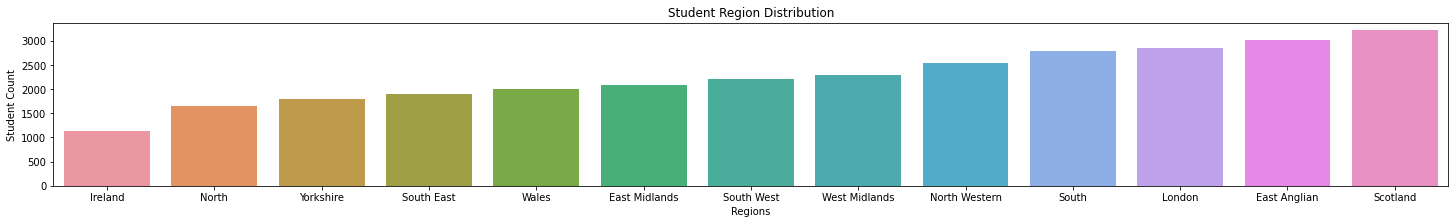

In [3]:
sorted_regions = stud_info['region'].value_counts().sort_values()
plt.figure(figsize=(25, 3))
plt.title('Student Region Distribution')
sns.countplot(data=stud_info, x=stud_info['region'], order = stud_info['region'].value_counts(ascending=True).index).set(xlabel='Regions', ylabel='Student Count')

Here we can see the distribution of students by region. Our students come from various regsions of the UK, Scotland, Ireland and Wales.

**IMD Band**

[Text(0.5, 0, 'IMD Bands'), Text(0, 0.5, 'Student Count')]

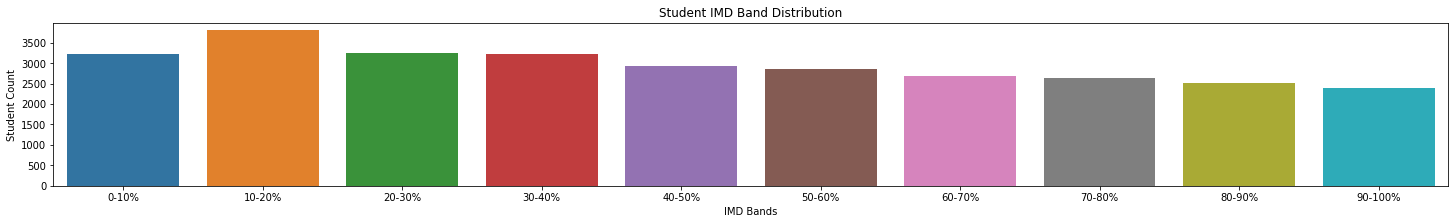

In [4]:
# list of imd possibilites
imds = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
plt.figure(figsize=(25, 3))
plt.title('Student IMD Band Distribution')
sns.countplot(data=stud_info, x=stud_info['imd'], order=imds).set(xlabel='IMD Bands', ylabel='Student Count')

In this bar graph we see the distribution of students by IMD band. Many students seem to be in more deprived countries with a spike in students in the 10-20% band.

In [5]:
under_50_imd = stud_info['imd'].value_counts().reset_index().sort_values('index')['imd'][0:5].sum()
total_imd = stud_info['imd'].value_counts().reset_index()['imd'].sum()
perc_under_50_imd = percentage(under_50_imd,total_imd)
md(f'''
{perc_under_50_imd}% of our students are from areas under 50% of the IMD band

* assuming IMD band is a problem
''')


55.64% of our students are from areas under 50% of the IMD band

* assuming IMD band is a problem


**Age**

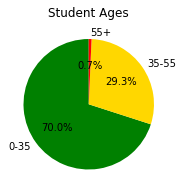

In [6]:
# list of age_band possibilities
ages = ['0-35', '35-55', '55+']
age_freqs = stud_info['age'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.title('Student Ages')
plt.pie(data=stud_info, x=age_freqs, labels=ages, autopct='%1.1f%%', startangle=90, colors=['green', 'gold', 'red'])
plt.show()

* over 70% of our students are under 35 and under 1% are age 55+

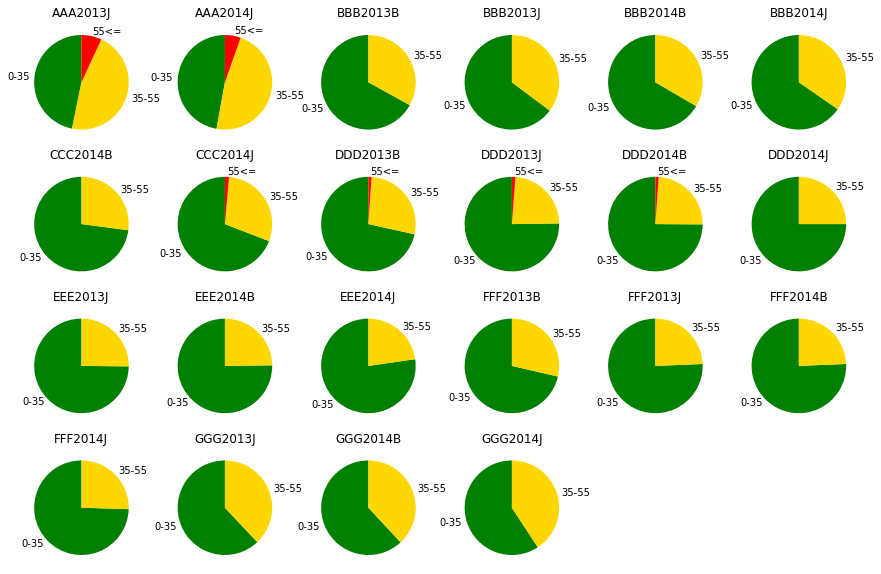

In [7]:
# multiple pie charts
stud_age_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['age'], columns=stud_info['age'], aggfunc='count', normalize='index')

fig, axes = plt.subplots(4, 6, figsize=(15, 10))

for i, (idx, row) in enumerate(stud_age_freq.iterrows()):
    ax = axes[i // 6, i % 6]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=90, colors=['green', 'gold', 'red'], normalize=True)
    ax.set_title(idx)
else:
    [ax.set_visible(False) for ax in axes.flatten()[i+1:]]

fig.subplots_adjust(wspace=.2)

It seems that many of our students over 35 were interested in the AAA class which also contains the bulk of our 55+ students. The rest of the courses are, as expected, dominated by younger students.

**Gender**

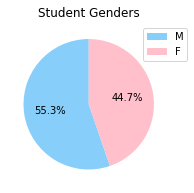

In [8]:
genders = ['M', 'F']
gender_freqs = stud_info['gender'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.title('Student Genders')
plt.pie(data=stud_info, x=gender_freqs, autopct='%1.1f%%', startangle=90, colors=['lightskyblue', 'pink'])
plt.legend(labels=genders, bbox_to_anchor=(.8,1), loc='upper left') 

Our male to female student distribution is fairly even with the male population being slightly more dominant

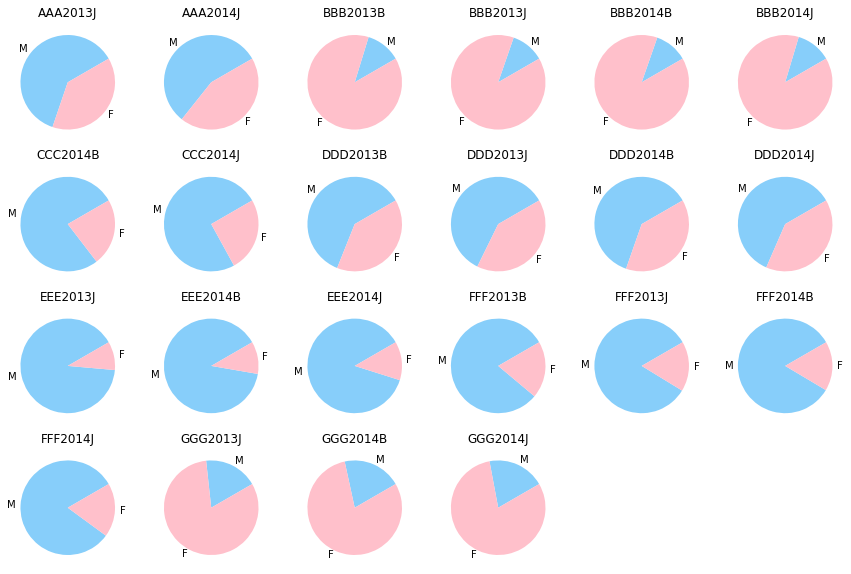

In [9]:
# multiple pie charts
gender_res_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['gender'], columns=stud_info['gender'], aggfunc='count', normalize='index')
gender_res_freq = gender_res_freq[['M','F']]
fig, axes = plt.subplots(4, 6, figsize=(15, 10))

for i, (idx, row) in enumerate(gender_res_freq.iterrows()):
    ax = axes[i // 6, i % 6]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30, colors=['lightskyblue', 'pink'], normalize=False)
    ax.set_title(idx)
else:
    [ax.set_visible(False) for ax in axes.flatten()[i+1:]]

fig.subplots_adjust(wspace=.2)

It seems GGG and BBB courses attract many more females than males, while The rest of the courses are dominated by male students.

**Education**

[Text(0.5, 0, 'Student Education Level'), Text(0, 0.5, 'Student Count')]

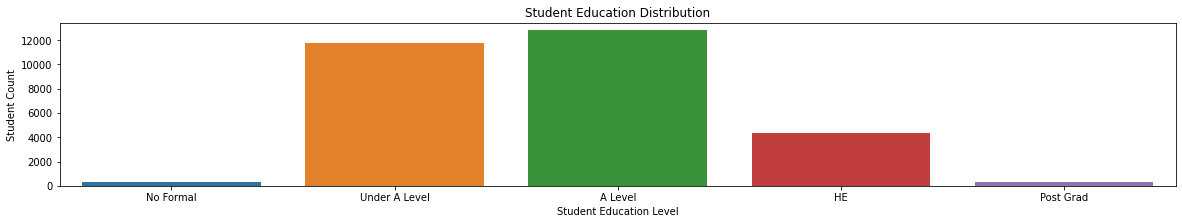

In [10]:
# list of education possibilities
educations = ['No Formal', 'Under A Level', 'A Level', 'HE', 'Post Grad']
plt.figure(figsize=(20, 3))
plt.title('Student Education Distribution')

sns.countplot(data=stud_info, x=stud_info['education'], order=educations).set(xlabel= 'Student Education Level', ylabel='Student Count')

Most of our students fall Under A Level or at A Level as their furthest education. Post Grad Students and students with no formal education are underrespresented.

**Disability**

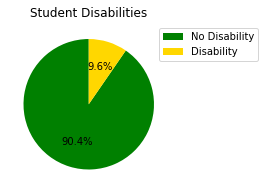

In [11]:
disabilities=['No Disability', 'Disability']
disability_freqs = stud_info['disability'].value_counts(normalize=True)
plt.figure(figsize=(25, 3))
plt.title('Student Disabilities')
plt.pie(data=stud_info, x=disability_freqs, autopct='%1.1f%%', startangle=90, colors=['green', 'gold'])
plt.legend(labels=disabilities, loc='upper left', bbox_to_anchor=(.9,1))

Under 10% of our students identified as having disabilities and so are underrepresented in this group.

**Student Results**

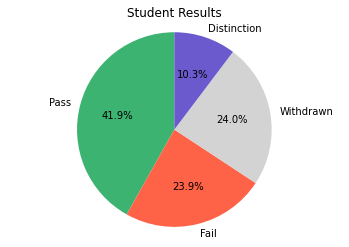

In [12]:
# list of result possibilities
results = ['Pass', 'Fail', 'Withdrawn', 'Distinction']
result_freqs = stud_info['result'].value_counts(normalize=True)
pass_perc = round((result_freqs[0] * 100), 1)
withdraw_perc = round((result_freqs[1] * 100), 1)
fail_perc = round((result_freqs[2] * 100), 1)
distinct_perc = round((result_freqs[3] * 100), 1)
results_percs = [pass_perc, fail_perc, withdraw_perc, distinct_perc]

fig1, ax = plt.subplots()
ax.pie(results_percs, labels=results, autopct='%1.1f%%', startangle=90,colors=['MediumSeaGreen', 'Tomato', 'LightGray','SlateBlue'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Student Results')
plt.show()


In [13]:
neg_result = round(fail_perc + withdraw_perc)
pos_result = round(pass_perc + distinct_perc)
md(f'''
Here we can see that we have a negative result of withdrawing or failing nearly **{neg_result}%** of the time,
with around **{pos_result}%** of students achieving a positive result of passing or passing with distinction.
''')


Here we can see that we have a negative result of withdrawing or failing nearly **48%** of the time,
with around **52%** of students achieving a positive result of passing or passing with distinction.


In [14]:
modpres_res_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['result'], columns=stud_info['result'], aggfunc='count')
modpres_res_freq = modpres_res_freq.reset_index()
modpres_res_freq = modpres_res_freq.astype({'Distinction':int, 'Pass':int, 'Fail':int, 'Withdrawn':int})
modpres_res_freq['total'] = modpres_res_freq['Pass'] + modpres_res_freq['Fail'] + modpres_res_freq['Withdrawn'] + modpres_res_freq['Distinction']
modpres_res_freq[['Distinction','Pass', 'Fail', 'Withdrawn']] = modpres_res_freq[['Distinction','Pass', 'Fail', 'Withdrawn']].div(modpres_res_freq['total'], axis=0) *100
modpres_res_freq = modpres_res_freq[['module_presentation', 'Pass', 'Fail', 'Withdrawn', 'Distinction', 'total']]

Let's see the total students per course

<AxesSubplot:title={'center':'% of Student Passes Per Course'}, xlabel='Course', ylabel='Student Count'>

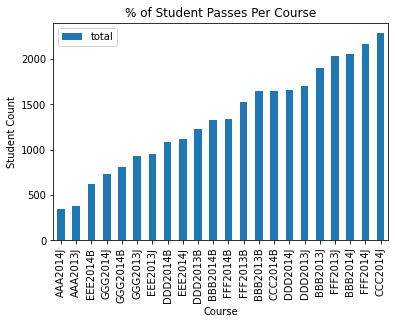

In [15]:
modpres_res_freq.sort_values(by='total').plot.bar(rot=90, x='module_presentation', y='total', title='% of Student Passes Per Course', xlabel='Course', ylabel='Student Count')

BBB, CCC, DDD and FFF courses seem to be the most popular. Let's see the results for our modules

<AxesSubplot:title={'center':'% of Students with Distinction Per Course'}, xlabel='Course', ylabel='Student Count'>

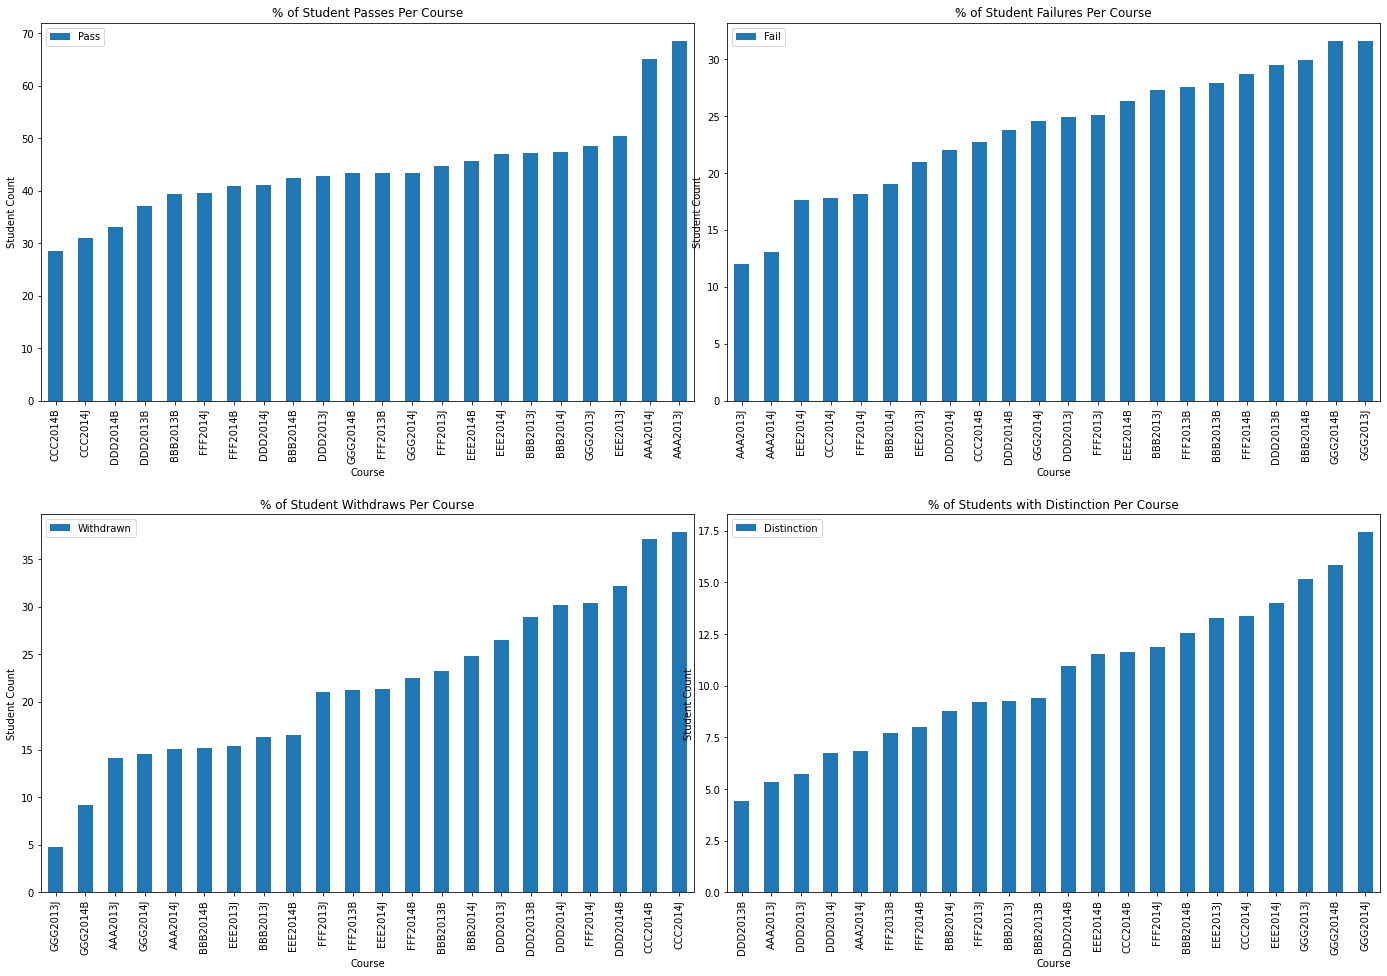

In [16]:
#Build subplot with three rows and two columns
nrows = 2
ncols = 2
fig, axes = plt.subplots(figsize=(24, 16) , nrows = nrows, ncols = ncols)
plt.subplots_adjust(wspace=.05, hspace=.3)
modpres_res_freq.sort_values(by='Pass').plot.bar(rot=90, ax=axes[0][0], x='module_presentation', y='Pass', title='% of Student Passes Per Course', xlabel='Course', ylabel='Student Count')
modpres_res_freq.sort_values(by='Fail').plot.bar(rot=90, ax=axes[0][1], x='module_presentation', y='Fail', title='% of Student Failures Per Course', xlabel='Course', ylabel='Student Count')
modpres_res_freq.sort_values(by='Withdrawn').plot.bar(rot=90, ax=axes[1][0], x='module_presentation', y='Withdrawn', title='% of Student Withdraws Per Course', xlabel='Course', ylabel='Student Count')
modpres_res_freq.sort_values(by='Distinction').plot.bar(rot=90, ax=axes[1][1], x='module_presentation', y='Distinction', title='% of Students with Distinction Per Course',xlabel='Course', ylabel='Student Count')

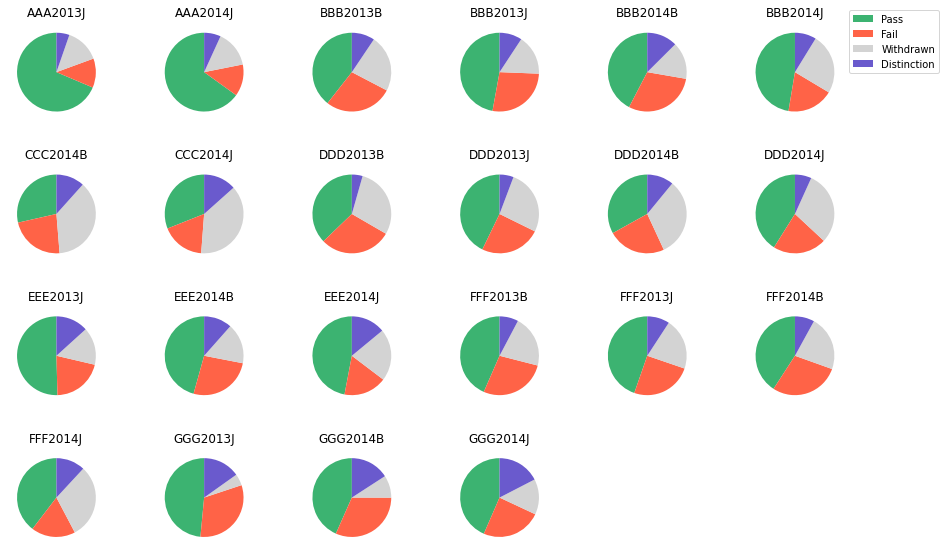

In [17]:
# multiple pie charts
result_res_freq = pd.crosstab(stud_info['module_presentation'], values=stud_info['result'], columns=stud_info['result'], aggfunc='count', normalize='index')
result_res_freq = result_res_freq[['Pass', 'Fail', 'Withdrawn', 'Distinction']]
fig, axes = plt.subplots(4, 6, figsize=(15, 10))

for i, (idx, row) in enumerate(result_res_freq.iterrows()):
    ax = axes[i // 6, i % 6]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle=90, colors=['MediumSeaGreen', 'Tomato', 'LightGray','SlateBlue'],  normalize=True)
    ax.set_title(idx)
else:
    [ax.set_visible(False) for ax in axes.flatten()[i+1:]]
    
ax.legend(labels=results, bbox_to_anchor=(4,5.5), loc='upper left') 
fig.subplots_adjust(wspace=.5)

We can see here that AAA modules had the highest percentage of students passing with GGG modules having the highest percent of failing students. The results of GGG could be that the full course weight of GGG is on that final exam giving students no chance to balance a poor final performance.

Also noticable here is that the courses which we noted had the highest amount of students have a high amount of failures and withdrawals. It would be interesting to see if class size had an effect on student success, so we will add the column `class_size` reflecting the size of the class each student is enrolled in.

In [18]:
class_size = stud_info.pivot_table(values='id_student', index='module_presentation', aggfunc='count')
stud_info = stud_info.merge(class_size, how='outer', on='module_presentation')
stud_info.rename(columns={'id_student_y':'class_size', 'id_student_x':'id_student'}, inplace=True)
merged_assessments = merged_assessments.merge(class_size, how='outer', on='module_presentation')
merged_assessments.rename(columns={'id_student_y':'class_size', 'id_student_x':'id_student'}, inplace=True)

### Assessments Visualizations

* Do certain types of exams get better scores?

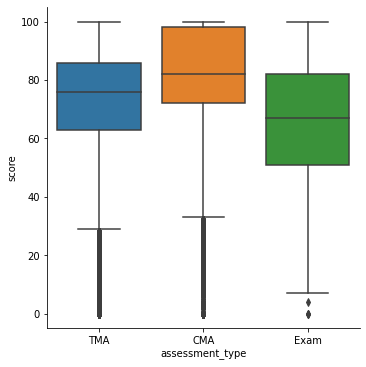

In [19]:
sns.catplot(x='assessment_type', y='score', data=merged_assessments, kind='box')

According to our data computer marked exams get the best average scores, followed by the tutor marked exams and then the final exams.

* Is there a relationship between clicks and exam scores?

In [20]:
not_na_clicks = merged_assessments[(~merged_assessments['sum_click'].isna())]

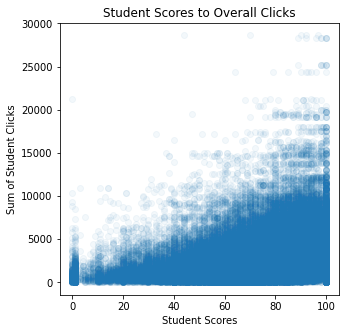

In [21]:
plt.figure(figsize=(5, 5))
plt.title('Student Scores to Overall Clicks')
plt.xlabel("Student Scores")
plt.ylabel("Sum of Student Clicks")
plt.scatter(data=not_na_clicks, y='sum_click', x='score', alpha=.05, )

There does seem to be a positive correlation with the sum of clicks and student score. Interestingly there is a spike of scores at 0 where it looks like students with no clicks do better than students with around 5-20 clicks. Let's take a look at these students who have high scores, but low clicks.

In [22]:
not_na_clicks[not_na_clicks['sum_click'] < 1000].sort_values('score', ascending=False).head(40)

,module,presentation,id_student,id_assessment,assessment_type,date,date_submitted,weight,sum_click,avg_click,score,module_presentation,class_size
25372,BBB,2013J,602458,15003,CMA,54.0,56,1.0,779,2.85,100,BBB2013J,1962
163980,GGG,2013J,519091,37420,CMA,229.0,175,0.0,542,2.95,100,GGG2013J,935
163978,GGG,2013J,519091,37418,CMA,229.0,105,0.0,542,2.95,100,GGG2013J,935
18587,BBB,2013J,522622,15005,CMA,131.0,-1,1.0,21,2.1,100,BBB2013J,1962
37452,BBB,2014B,447292,15015,CMA,47.0,49,1.0,228,2.24,100,BBB2014B,1348
37447,BBB,2014B,447265,15016,CMA,82.0,84,1.0,162,1.88,100,BBB2014B,1348
37446,BBB,2014B,447265,15015,CMA,47.0,49,1.0,162,1.88,100,BBB2014B,1348
163964,GGG,2013J,515496,37419,CMA,229.0,143,0.0,507,3.45,100,GGG2013J,935
18616,BBB,2013J,522889,15003,CMA,54.0,56,1.0,629,2.36,100,BBB2013J,1962
18617,BBB,2013J,522889,15004,CMA,96.0,102,1.0,629,2.36,100,BBB2013J,1962


So taking a look at the top 40 scores in students who had a sum_click under 20 but great scores, it looks like many are from the BBB module, the date submitted was either -1, the day before the course began, or otherwise very early in the course and the weight of these exams were zero to one. Perhaps this exam was one where students could not get wrong answers. Let's pick one of these zero weight exams and see what scores other students received.

In [23]:
dataframe(not_na_clicks[not_na_clicks['id_assessment'] =='15003'].sort_values('score')['score'].value_counts())

,score
100,1091
80,306
60,58
40,10
20,1


So while this was probably amn easy exam as so many students got 100 points, some did not. It is exams like this that are causing our spike at zero though.

The relationship between average clicks is likely to be similar, but let's see what we can see.

In [24]:
# checking that there are no exams that are all the same score
all_same_score = []
for i,r in assessments.iterrows():
    if r['id_assessment'] not in missing_exams['id_assessment'].values:
        temp_df = not_na_clicks[not_na_clicks['id_assessment'] == r['id_assessment']]
        temp_df.drop_duplicates(subset='score')
        if temp_df.empty:
            all_same_score.append(r['id_assessment'])
len(all_same_score)

0

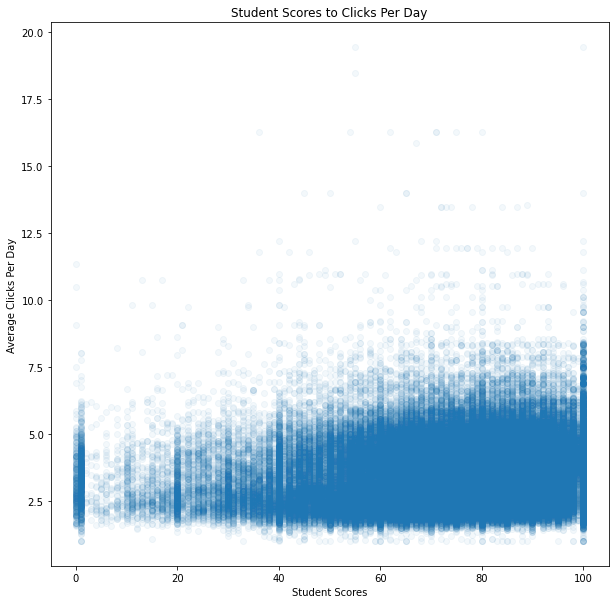

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Student Scores to Clicks Per Day')
plt.xlabel("Student Scores")
plt.ylabel("Average Clicks Per Day")
plt.scatter(data=not_na_clicks, y='avg_click', x='score', alpha=.05)

The same relationship seems to hold, where average clicks per day seem to be related to increased scores, but the overall effects seem to have a peak at around 6 clicks per day, where after that there is not much of a score increase per average click. Students who got 100s on their exams do seem to have a much higher click average than their peers where many students seem to have 7-9 interactions with resources per day.

* Do some modules get generally better results than others?

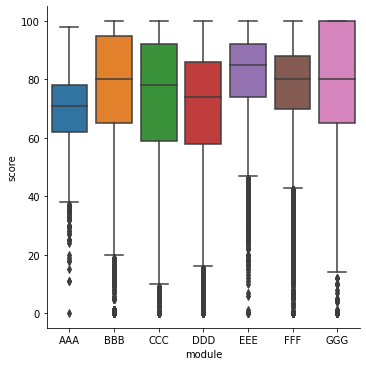

In [26]:
sns.catplot(x='module', y='score', data=merged_assessments, kind='box')

It seems that EEE, FFF and GGG have generally higher exam scores. GGG we saw had the highest failure rate, but seems to be getting among the best average scores. This is likely due to GGG's full grade being reliant on the final.

**What are the engagement levels of these modules?**

Let's take a look at each modules clicks per student

In [27]:
clicks_per_stud = not_na_clicks.pivot_table(index='module', values=['sum_click', 'class_size'], aggfunc='sum')
clicks_per_stud['click_per_student'] = clicks_per_stud['class_size'].div(clicks_per_stud['sum_click'])
clicks_per_stud = clicks_per_stud.reset_index()

<AxesSubplot:xlabel='module', ylabel='click_per_student'>

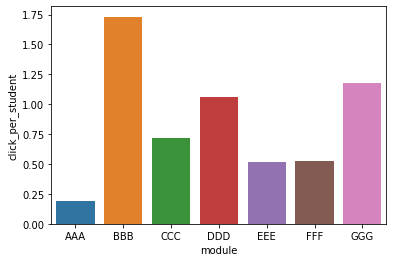

In [28]:
sns.barplot(x='module', y='click_per_student', data=clicks_per_stud)

AAA has the lowest engagement per student and BBB has the highest. Again GGG seems to have had good student engagement and likely would have had passing students if the exams were formatted differently.

**Does the assessment weight have an effect on scores?**

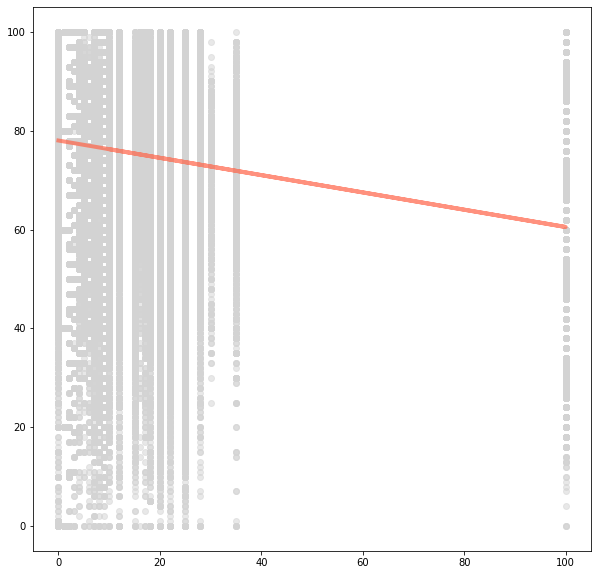

In [29]:
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['weight'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

It does seem as the assessment weight increases the average score goes down. There is a large gap in our data though since the non-final exams only go up to weight 35. This might dramatize our relationship here. Let's see if this relationship holds true for exams under weight 100

In [30]:
under_50_weight = merged_assessments.loc[merged_assessments['weight'] < 100]

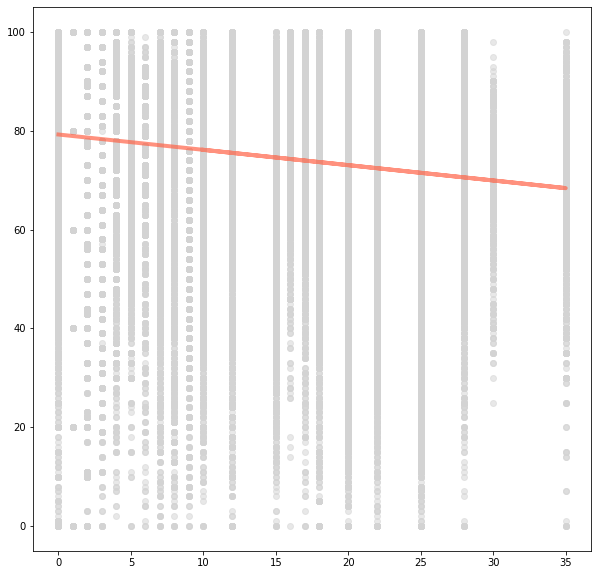

In [31]:
plt.figure(figsize=(10, 10))
x = np.array(under_50_weight['weight'].astype(int))
y = np.array(under_50_weight['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

Indeed the exam scores do seem to get worse as the weight of the exams increases. We know the weight of the final exams is always 100, let's see the average weight of the tutor marked exams

In [32]:
pd.pivot_table(merged_assessments, index='assessment_type', values='weight', aggfunc='mean')

,weight
assessment_type,
CMA,1.271159
Exam,100.0
TMA,16.568486


The tutor marked exams carry a significantly higher weight than the computer marked exams

* Do assessment scores get better over time?

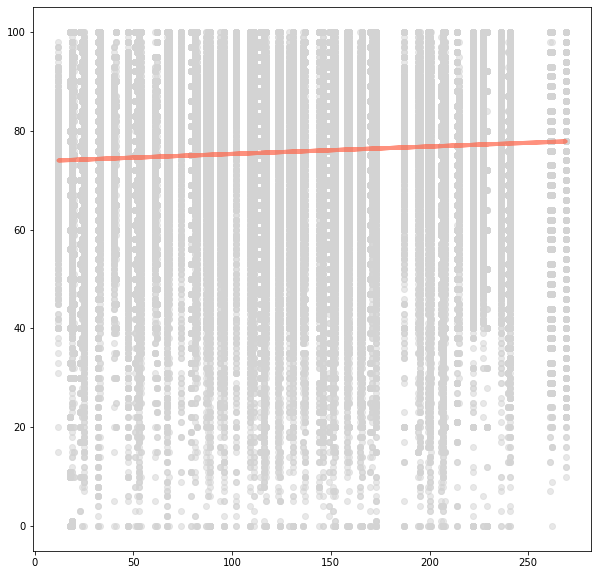

In [33]:
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['date'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

According to our line of best fit the assessment scores are getting slightly better over time

* What is the relationship between student scores and date submitted?

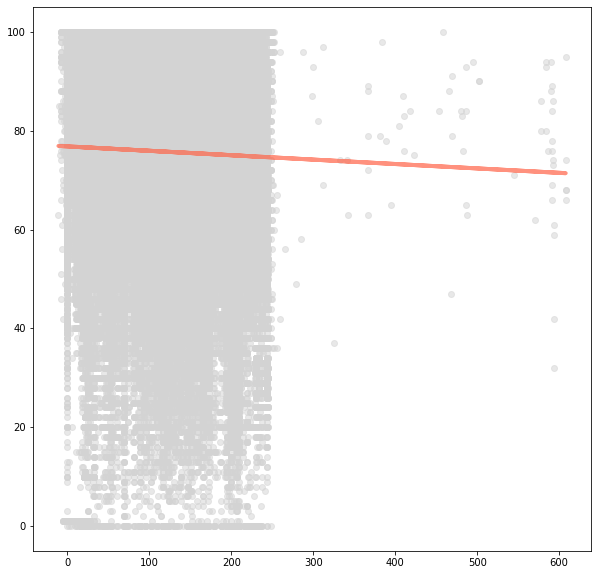

In [34]:
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['date_submitted'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

It seems as the date submitted gets later and later, student scores get worse and worse.

Let's see how, how many days late an assignment is affects the score by adding a column to indicate how many days late an assessment was by subtracting the `date` from `date_submitted`

In [43]:
merged_assessments['days_late'] = merged_assessments['date_submitted'] - merged_assessments['date']

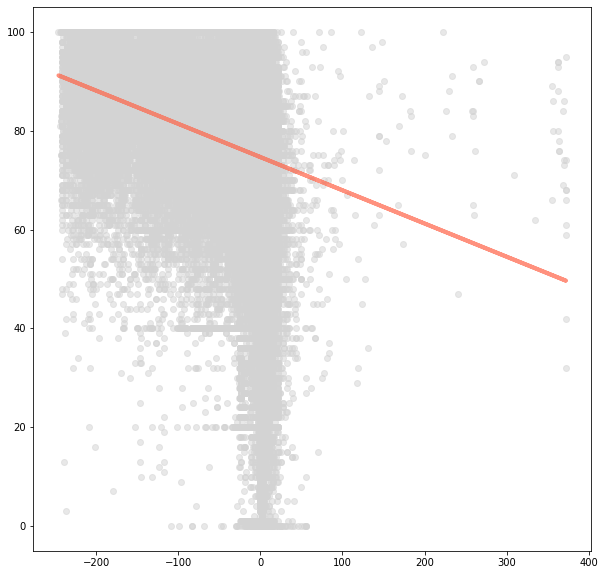

In [44]:
plt.figure(figsize=(10, 10))
x = np.array(merged_assessments['days_late'].astype(int))
y = np.array(merged_assessments['score'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

We can see here that students who turned in their exams earlier clearly got much better scores, and the lter the turn in the worse the score trended toward. We also see that a great deal of students submitted their exams on time or early.

## VLE Visualizations

Which resources get the most interaction?

<AxesSubplot:title={'center':'Student Interaction per Activity Type'}, xlabel='activity_type', ylabel='count'>

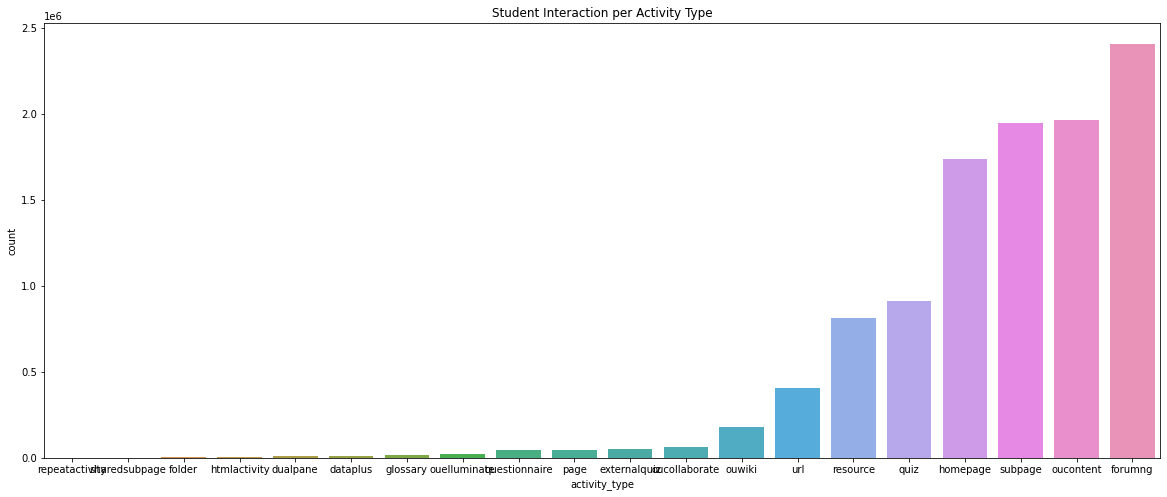

In [35]:
sorted_activities = merged_vle['activity_type'].value_counts().sort_values()
plt.figure(figsize=(20, 8))
plt.title('Student Interaction per Activity Type')
plt.xlabel('Activity Type')
plt.ylabel('Interaction Count')
sns.countplot(data=merged_vle, x='activity_type', order = merged_vle['activity_type'].value_counts(ascending=True).index)

The most popular area seems to be forums where students can interact. "oucontent" stands for "Open University" content which is the source of our data. This is the meat and potatoes of Open University and is how students learn. The homepage of course is going to be a frequent click as well as subpages of the Open University. Quizzes, and resources are made available to students as whell at the Open University Wiki. After this, the student interactions with certain resources grow less and less significant. 

Do Clicks increase over time?

In [36]:
Q1 = merged_vle['sum_click'].quantile(0.25)
Q3 = merged_vle['sum_click'].quantile(0.75)
IQR = Q3 - Q1
vle_no_outliers = merged_vle[~(merged_vle['sum_click'] > (Q3 + 1.5 * IQR))]
clicks_per_day = vle_no_outliers.pivot_table(vle_no_outliers, index='date', aggfunc='sum').reset_index()

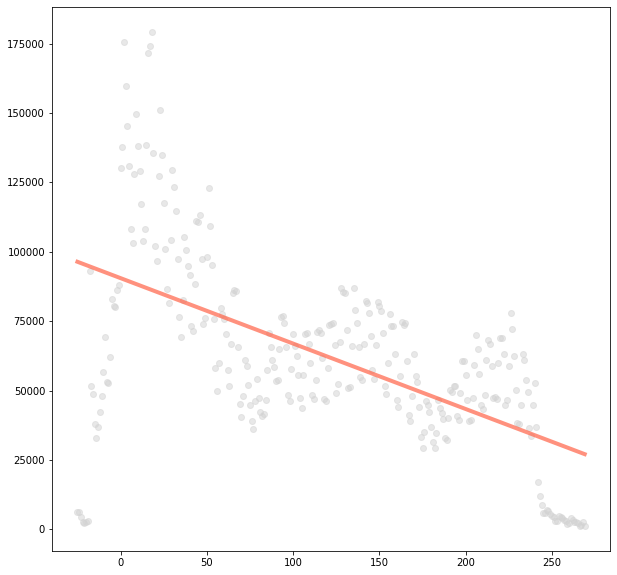

In [37]:
clicks_per_day = vle_no_outliers.pivot_table(vle_no_outliers, index='date', aggfunc='sum').reset_index()
plt.figure(figsize=(10, 10))
x = np.array(clicks_per_day['date'].astype(int))
y = np.array(clicks_per_day['sum_click'].astype(int))
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, alpha=.5, color='lightgrey')
plt.plot(x, m*x + b, color='tomato', lw=4, alpha=.7)

The clicks per day overall start quite high, but decrease sharply up until day 75 when they start to go up and then drop again around day 150 repeating this pattern until the end of the modules. It is interesting that it is every 75 days that student interest reaches a low point, and then rises again.

Cleaning for the algorithms

* For ages we see that there is less than 1% of people in the 55 and over range and so we will combine that with the 35-55 range to make two ranges: 0-35 and 35+

* We will be using classification to identify students as having negative or positive results and so will identify `Distinction` and `Pass` as positive results which we will label as boolean True and `Fail` and `Withdrawn` as negative results which we will label as boolean False. This will be done in another column.

* We can merge the courses and student information data frames to add the course length to student information as a potential predictor of student success.

* We can then merge the assessments and student information dataframes to add student demographical information, and the course length as potential predictors of student assessment scores.

* We will merge the VLE and student outcome data (pass, fail, withdrawn, distinction) to predict student outcomes based on resource interaction.

In [40]:
stud_info = stud_info.replace({'age':{'55<=':'35+', '35-55':'35+'}})
classify_results(stud_info)
stud_info = stud_info.merge(courses, how='outer', on=['module', 'presentation', 'module_presentation'])
stud_info = stud_info.dropna(subset=['result'])
stud_info = stud_info.drop(columns=['_merge'])

In [41]:
pd.set_option('display.max_columns', None)
merged_assess_info = merged_assessments.merge(stud_info, how='outer', on=['id_student', 'module', 'presentation', 'module_presentation', 'sum_click', 'avg_click', 'class_size'], indicator=True)
merged_assess_info = merged_assess_info[merged_assess_info['_merge'] == 'both']
merged_assess_info = merged_assess_info.drop(columns=['result', 'date_unregistration', '_merge'])
merged_assess_info

,module,presentation,id_student,id_assessment,assessment_type,date,date_submitted,weight,sum_click,avg_click,score,module_presentation,class_size,region,imd,age,gender,education,disability,attempts,credits,module_presentation_length_x,module_presentation_length_y
0,AAA,2013J,11391,1752,TMA,19.0,18,10.0,934,4.77,78,AAA2013J,378,East Anglian,90-100%,35+,M,HE,False,0,240,268.0,268.0
1,AAA,2013J,11391,1753,TMA,54.0,53,20.0,934,4.77,85,AAA2013J,378,East Anglian,90-100%,35+,M,HE,False,0,240,268.0,268.0
2,AAA,2013J,11391,1754,TMA,117.0,115,20.0,934,4.77,80,AAA2013J,378,East Anglian,90-100%,35+,M,HE,False,0,240,268.0,268.0
3,AAA,2013J,11391,1755,TMA,166.0,164,20.0,934,4.77,85,AAA2013J,378,East Anglian,90-100%,35+,M,HE,False,0,240,268.0,268.0
4,AAA,2013J,11391,1756,TMA,215.0,212,30.0,934,4.77,82,AAA2013J,378,East Anglian,90-100%,35+,M,HE,False,0,240,268.0,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173734,GGG,2014J,573320,37439,CMA,229.0,227,0.0,141,3.71,80,GGG2014J,732,South East,80-90%,35+,F,Under A Level,False,0,30,269.0,269.0
173735,GGG,2014J,573320,37440,CMA,229.0,227,0.0,141,3.71,100,GGG2014J,732,South East,80-90%,35+,F,Under A Level,False,0,30,269.0,269.0
173736,GGG,2014J,573320,37441,CMA,229.0,227,0.0,141,3.71,100,GGG2014J,732,South East,80-90%,35+,F,Under A Level,False,0,30,269.0,269.0
173737,GGG,2014J,573320,37442,CMA,229.0,227,0.0,141,3.71,20,GGG2014J,732,South East,80-90%,35+,F,Under A Level,False,0,30,269.0,269.0


In [ ]:
stud_info_results = stud_info[['id_student', 'result']]
merged_vle_result = merged_vle.merge(stud_info_results, how='outer', on='id_student').dropna()

Note:

We will be using classification for the the student info/result dataframe to find the best predictors of student outcomes overall and then seperately combining the student info/assessments dataframe and using regression to find the best predictors of student exam scores.

It would be presumable that these would line up with one another, afterall if a student gets good exam scores, generally they will get a successful outcome, and the opposite should also be true. In this case though, predictors of student exam scores may not align with the predictors of student outcome since many exams are weighted at zero or a very low weight potentially resulting in students doing well on many exams despite not passing the course. This also can show the scores of students who withdrew and so achieved a negative result despite getting good scores.

We will also be assessing the relationship between student interaction with certain resources and student success using classification.

## Student Info
---
    
* Are any student demographics a good predictor of a student's negative or positive result in a course?

* Are any student behaviors a good predictor of a student's negative or positive result in a course? (credits taken, previous attempts, registration date, sum click and avg click)

* Are any student demographics a good predictor of scores on exams?
     
* Are any student behaviors a good predictor of a scores on exams? (credits taken, previous attempts, registration date, sum click, avg click, and days late)

In [ ]:
# dictionary mapping column string names to the above lists to pass to the change_col_val function
col_dict = {'imd':imds, 'region':regions, 'disability':disabilities, 'age_band':ages, 'module':modules, 'highest_education':educations, 'gender':genders, 'final_result':results}

**What are the most significant predictors of student outcome?**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(stud_info, test_size=.2, random_state=92, stratify=stud_info)

**What are the most significant predictors of student scores?**

**Is interaction with a certain resource a good predictor of student success?**

**Conclusions**

* Most of our students are under the age of 35, potentially come from lower economic backgrounds and have had less than the equivalent of a high school education. This is important because the courses need to be geared toward this type of student, meaning teachers may want to avoid college level vocabulary. People in these groups also tend to be more likely to be working a job during their course.

<img src="Employment.png">

* According to the chart above, through 2013-2014 when these courses took place nearly 60% of 18-24 year old people and around 80% of 25-34 year old people in the UK were employed. That number has only increased over the years, and so it should be taken into account that students are likely to have a time crunch that teachers must respect.

* Nearly half of our students overall Fail or Withdraw
* GGG courses had the highest percentage of failing students as well as students with distinction. This is likely due to the fact that the whole GGG course was weighted only on the final exam, and rode on students having a good or bad test day without them having room to balance it out with other scores. Despite having the highest percentage of failures, GGG had among the highest exam scores, so it is likely if those scores were included in their final grade these students would have done much better.
* It seems that students do the best on computer marked exams. This could be that the computer marked exams are easier, being something like multiple choice, and the tutor marked exams are open-ended questions. This could also be due to human error on the tutor's end. Exams seem to have the worst overall scores and it could be that the pressure of the exams gets to students, or that the final exams are much harder. We also do not have complete information on the final exams for all courses, and so this data may not be representative of the courses as a whole.
* Student interactions with resources per day seems to increase their exam scores plateuing at around 6 clicks per day, though the most successful students seem to be averaging higher than that.
* Assessments with higher weights seem to get worse grades. This could be due to the difficulty of the assessment, due to student anxiety, and potentially due to human error as the higher weight exams are those that are tutor marked.
* Exam scores seem to get better as the course goes on, but as the student takes longer to submit the exam the score goes down. Students should be encouraged to submit their exams as early as possible.

**Further/Next Time**

* It would have been interesting to be able to calculate student overall weighted averages in order to find the grades of students who withdrew to predict at what grade students usually withdrew at. This would have allowed us to calculate a 'warning' grade where students might withdraw if their grade falls below a certain number. With a warning grade, teachers might be able to reach out to students to get them the help they need instead of them withdrawing.

* It would have been great to have more reliable data on the unregistration dates for the same reason 

https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/employmentintheuk/october2019